<h1> Training</h1>
If you have annotations from the previous version of FRCNN, go to the 'convertFromCSV' notebook and follow the provided instructions. After doing so, return to this notebook.
<br> <br>
Before training, split your data into some training images and some validation images. To do this, add each training image as well as its corresponding annotation .xml file into the images/train folder in the FRCNN2 folder. Similarly, add each validation image as well as its corresponding annotation .xml file into the images/test folder. A 90% training image, 10% validation image split is recommended
<br> <br>
Run the cell below to define all imports and helper functions for this notebook

In [1]:
from library import *

Populate CLASSES with the classes you would like to find. As indictated, reserve the first entry for the background. 

In [2]:
# classes: first entry is reserved for background, DEFINE CLASSES HERE
CLASSES = [
    'background', 'frog'
]
NUM_CLASSES = len(CLASSES)

Training parameters are defined below

In [3]:
BATCH_SIZE = 4 # increase / decrease according to GPU memory
RESIZE_TO = 512 # resize the image for training and transforms
NUM_EPOCHS = 50 # number of epochs to train for
SAVE_PLOTS_EPOCH = 1 # save loss plots after these many epochs
SAVE_MODEL_EPOCH = 5 # save model after these many epochs

Run the cell below to load in your images and annotations. This cell will print the number of images found in the testing and training folder

In [4]:
# prepare the final datasets and data loaders
train_dataset = getDataset(TRAIN_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_train_transform())
valid_dataset = getDataset(VALID_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_valid_transform())
[train_loader, valid_loader] = get_loaders(train_dataset, valid_dataset, BATCH_SIZE, collate_fn)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

Number of training samples: 69
Number of validation samples: 50



Run the cell below to visualize your data to ensure that bounding boxes match images as expected. There will be gridlines in the image shown

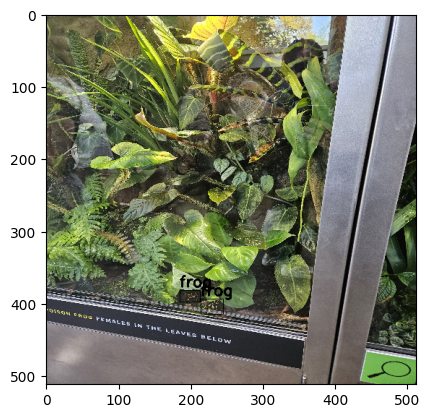

In [5]:
NUM_SAMPLES_TO_VISUALIZE = 1
visualize_samples(NUM_SAMPLES_TO_VISUALIZE, TRAIN_DIR, RESIZE_TO, CLASSES)

To start training from the default COCO weights run the cell below

In [6]:
model = create_model(num_classes=NUM_CLASSES)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:04<00:00, 40.3MB/s] 


To load a model to continue training run the cell below

In [ ]:
model_name = 'model5.pth'
model = load_model_train(model_name, MODEL_DIR, NUM_CLASSES=NUM_CLASSES)

Train your model by running the cell below! After the specified number of epochs passes, the model will be saved and a plot of the training/validation loss over time will be shown 


EPOCH 1 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #0 train loss: 0.389
Epoch #0 validation loss: 0.310
Took 0.948 minutes for epoch 0
SAVING PLOTS COMPLETE...

EPOCH 2 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #1 train loss: 0.310
Epoch #1 validation loss: 0.341
Took 0.941 minutes for epoch 1
SAVING PLOTS COMPLETE...

EPOCH 3 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #2 train loss: 0.327
Epoch #2 validation loss: 0.330
Took 0.964 minutes for epoch 2
SAVING PLOTS COMPLETE...

EPOCH 4 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #3 train loss: 0.303
Epoch #3 validation loss: 0.318
Took 0.944 minutes for epoch 3
SAVING PLOTS COMPLETE...

EPOCH 5 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #4 train loss: 0.301
Epoch #4 validation loss: 0.293
Took 0.941 minutes for epoch 4
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 6 of 50
Training


  0%|          | 0/18 [00:00<?, ?it/s]

KeyboardInterrupt: 

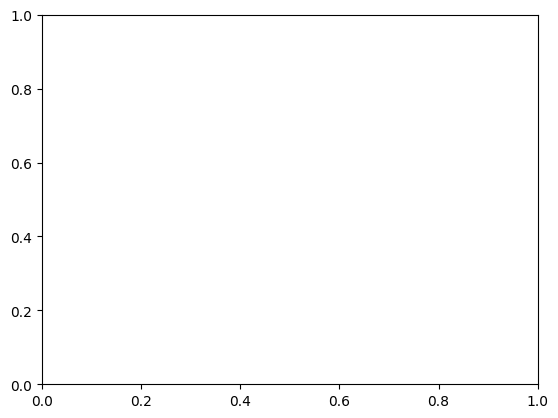

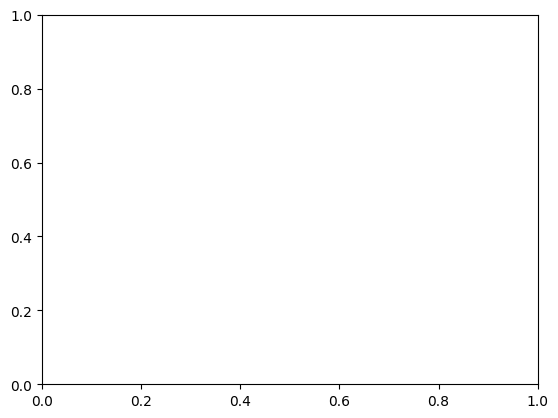

In [8]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# name to save the trained model with
MODEL_NAME = 'model'
[train_loss_list, val_loss_list] = train_model(model, train_loader, valid_loader, DEVICE, MODEL_NAME, NUM_EPOCHS, MODEL_DIR, PLOT_DIR, SAVE_MODEL_EPOCH, SAVE_PLOTS_EPOCH)
# Plot Validation & Training Loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)

In [ ]:
exp_results = run_experiment(train_dataset, valid_dataset, NUM_CLASSES, BATCH_SIZE, 
                             NUM_EXPERIMENTS=10, EPOCHS_PER_EXPERIMENT=50, TRIALS_PER_EXPERIMENT=5)


Running training with 6 samples, trial 1...

EPOCH 1 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #0 train loss: 0.839
Epoch #0 validation loss: 0.772
Took 0.539 minutes for epoch 0

EPOCH 2 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #1 train loss: 0.623
Epoch #1 validation loss: 0.522
Took 0.530 minutes for epoch 1

EPOCH 3 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #2 train loss: 0.357
Epoch #2 validation loss: 0.367
Took 0.530 minutes for epoch 2

EPOCH 4 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #3 train loss: 0.230
Epoch #3 validation loss: 0.305
Took 0.536 minutes for epoch 3

EPOCH 5 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #4 train loss: 0.198
Epoch #4 validation loss: 0.286
Took 0.540 minutes for epoch 4
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 6 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #5 train loss: 0.140
Epoch #5 validation loss: 0.283
Took 0.528 minutes for epoch 5

EPOCH 7 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #6 train loss: 0.160
Epoch #6 validation loss: 0.294
Took 0.539 minutes for epoch 6

EPOCH 8 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #7 train loss: 0.142
Epoch #7 validation loss: 0.304
Took 0.533 minutes for epoch 7

EPOCH 9 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #8 train loss: 0.121
Epoch #8 validation loss: 0.306
Took 0.534 minutes for epoch 8

EPOCH 10 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #9 train loss: 0.131
Epoch #9 validation loss: 0.313
Took 0.532 minutes for epoch 9
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 11 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch #10 train loss: 0.136
Epoch #10 validation loss: 0.319
Took 0.534 minutes for epoch 10

EPOCH 12 of 50
Training


  0%|          | 0/2 [00:00<?, ?it/s]

Validating


  0%|          | 0/13 [00:00<?, ?it/s]

<h1> Inferencing</h1>
Run the cells below to create bounding boxes for new data. Images with bounding boxes overlaid will be present in the outputs folder following inferencing as well. CSV files will also be created, one for the class of each object detected and one for the bounding boxes of said objects. Each row of the CSV file will correspond to each frame of the movie inferenced (in the case of movie inferencing) or each image in the ordering defined by the output images (in the case of image inferencing). Each bounding box is of the form [xmin ymin xmax ymax]
<br> <br>
First define the confidence threshold you would like to use for inferencing

In [24]:
detection_threshold = 0.1# 0.9 by default

Load your model by running the cell below

In [20]:
def create_model(num_classes):
    
    # load Faster RCNN pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights='COCO_V1')
    
    # get the number of input features 
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # define a new head for the detector with required number of classes
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 
    return model


def load_model(model_name, MODEL_DIR, NUM_CLASSES):
    # set the computation device
    modelPath = './models/' + model_name
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    # load the model and the trained weights
    model = create_model(num_classes=NUM_CLASSES).to(device)
    model.load_state_dict(torch.load(
        modelPath, map_location=device
    ))
    model.eval()
    return model

model_name = 'model5.pth'
model = load_model(model_name, MODEL_DIR, NUM_CLASSES)

<h2> Movie Inferencing </h2>
Run inferencing on your data by running the cell below. This will output a video to 'outpy.avi' which overlays bounding boxes with their respective classes. The variables 'bboxes' and 'classes' contain inferencing information for each frame. 

In [ ]:
# Path to video for inferencing
vidName = 'agar_4.avi'
DIR_TEST = './test_data/' + vidName
# Output file name
outputName = 'outpy.avi'

[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
[bboxes, classes, scores] = inference_video(DIR_TEST, OUT_DIR, outputName, model, detection_threshold, CLASSES, save_detections=True)
saveBoxesClassesScores(boxFileName, classFileName, scoreFileName, bboxes, classes, scores, OUT_DIR)

<h2> Image Inferencing </h2>

In [ ]:
# Path to folder of images for inferencing
folderName = './test_data/test_images/'
[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
[bboxes, classes, scores] = inference_images(folderName, model, OUT_DIR, detection_threshold, CLASSES)
saveBoxesClassesScores(boxFileName, classFileName, scoreFileName, bboxes, classes, scores, OUT_DIR)

## Image Inferencing + Figure Maker

In [27]:
DIR_TEST = './test_data/test_images/'
[bboxes, classes, sscores] = inference_images_figs(DIR_TEST, model, OUT_DIR, detection_threshold, CLASSES)

Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE


In [26]:
def inference_images_figs(DIR_TEST, model, OUT_DIR, detection_threshold, CLASSES):
    imagePath = glob.glob(f"{DIR_TEST}/*.png")
    image_extensions = ['jpg', 'jpeg', 'gif', 'bmp', 'tiff', 'webp']
    all_extensions = image_extensions + [ext.upper() for ext in image_extensions]  # Add uppercase versions
    for extension in all_extensions:
        imagePath.extend(glob.glob(f"{DIR_TEST}/*.{extension}"))

    all_images = [image_path.split('/')[-1] for image_path in imagePath]
    all_images = sorted(all_images)
    num_images = len(all_images)
    classes = [None] * num_images
    bboxes = [None] * num_images
    sscores = [None] * num_images
    
    for idx, el in enumerate(all_images):
        orig_image = cv2.imread(DIR_TEST + '/' + el)
        # BGR to RGB
        image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB).astype(np.float32)
        # Normalize the pixel values (between 0 and 1)
        image /= 255.0
        # Rearrange color channels
        image = np.transpose(image, (2, 0, 1)).astype(float)
        # Convert to tensor
        image_tensor = torch.tensor(image, dtype=torch.float).cuda() if torch.cuda.is_available() else torch.tensor(image, dtype=torch.float)
        # Add batch dimension
        image_tensor = torch.unsqueeze(image_tensor, 0)
        
        with torch.no_grad():
            outputs = model(image_tensor)
        
        outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
        
        if len(outputs[0]['boxes']) != 0:
            boxes = outputs[0]['boxes'].data.numpy()
            scores = outputs[0]['scores'].data.numpy()
            sscores[idx] = scores[scores >= detection_threshold]
            boxes = boxes[scores >= detection_threshold].astype(np.int32)
            bboxes[idx] = boxes
            draw_boxes = boxes.copy() 
            
            pred_classes = [CLASSES[i] for i in outputs[0]['labels'].cpu().numpy()]
            pred_classes = np.array(pred_classes)
            pred_classes = pred_classes[scores >= detection_threshold]
            classes[idx] = pred_classes
            
            for j, box in enumerate(draw_boxes):
                x1, y1, x2, y2 = box
                cv2.rectangle(orig_image, (x1, y1), (x2, y2), (0, 0, 255), 4)
                cv2.putText(orig_image, str(pred_classes[j]), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                
                # Extract and enlarge the detected region
                detected_img = orig_image[y1:y2, x1:x2]
                factor = 2  # Change factor to desired zoom
                enlarged_img = cv2.resize(detected_img, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)
                
                # Calculate where to place the enlarged image on the original
                eh, ew, _ = enlarged_img.shape
                ex, ey = 3000, 900  # Starting coordinates for the enlarged image (top left)
                if (j == 1):
                    ex, ey = 3000,50
                
                # Ensure the enlarged image does not go out of the bounds of the original image
                if ey + eh > orig_image.shape[0]:
                    ey = orig_image.shape[0] - eh
                if ex + ew > orig_image.shape[1]:
                    ex = orig_image.shape[1] - ew
                
                # Overlay the enlarged image on the original image
                orig_image[ey:ey+eh, ex:ex+ew] = enlarged_img
                
                # Draw lines connecting the small and enlarged boxes
                cv2.line(orig_image, (x2, y1), (ex, ey), (255, 0, 0), 4)
                cv2.line(orig_image, (x2, y2), (ex, ey + eh), (255, 0, 0), 4)

            cv2.imwrite(OUT_DIR + '/' + el, orig_image)  # Save the modified image

        print(f"Image {idx+1} done...")
        print('-'*50)

    print('TEST PREDICTIONS COMPLETE') 
    return [bboxes, classes, sscores]